<a href="https://colab.research.google.com/github/AbdurNawaz/BlackJack-v0/blob/master/BlackJack_v0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gym
import numpy as np
import sys

from collections import defaultdict
from plot_utils import plot_blackjack_values, plot_policy

In [0]:
env = gym.make('Blackjack-v0')

In [22]:
print(env.observation_space)
print(env.action_space)

Tuple(Discrete(32), Discrete(11), Discrete(2))
Discrete(2)


In [0]:
def generate_episode_from_Q(env, Q, epsilon, nA):
  episode = []
  state = env.reset()
  while True:
    action = np.random.choice(np.arange(nA), p=get_probs(Q[state], epsilon, nA)) if state in Q else env.action_space.sample()
    next_state, reward, done, info = env.step(action)
    episode.append((state, action, reward))
    state = next_state
    if done:
      break
  return episode

def get_probs(Q_s, epsilon, nA):
    policy_s = np.ones(nA) * epsilon / nA
    best_a = np.argmax(Q_s)
    policy_s[best_a] = 1 - epsilon + (epsilon / nA)
    return policy_s

def update_Q(env, episode, Q, alpha, gamma):
  states, actions, rewards = zip(*episode)
  discounts = np.array([gamma**i for i in range(len(rewards)+1)])
  for i, state in enumerate(states):
    old_Q = Q[state][actions[i]] 
    Q[state][actions[i]] = old_Q + alpha*(sum(rewards[i:]*discounts[:-(1+i)]) - old_Q)
  return Q

In [0]:
def mc_control(env, num_episodes, alpha, gamma=1.0, eps_start=1.0, eps_decay=.99999, eps_min=0.05):
  nA = env.action_space.n
  Q = defaultdict(lambda: np.zeros(nA))
  epsilon = eps_start
  for i in range(1, num_episodes+1):
    if i%1000 == 0:
      print('\rEpisode {}/{}'.format(i, num_episodes), end="")
      sys.stdout.flush()
      
    epsilon = max(epsilon*eps_decay, eps_min)
    episode = generate_episode_from_Q(env, Q, epsilon, nA)
    Q = update_Q(env, episode, Q, alpha, gamma)
    
  policy = dict((k, np.argmax(v)) for k, v in Q.items())
  return policy, Q

In [29]:
policy, Q = mc_control(env, 500000, 0.02)

Episode 500000/500000

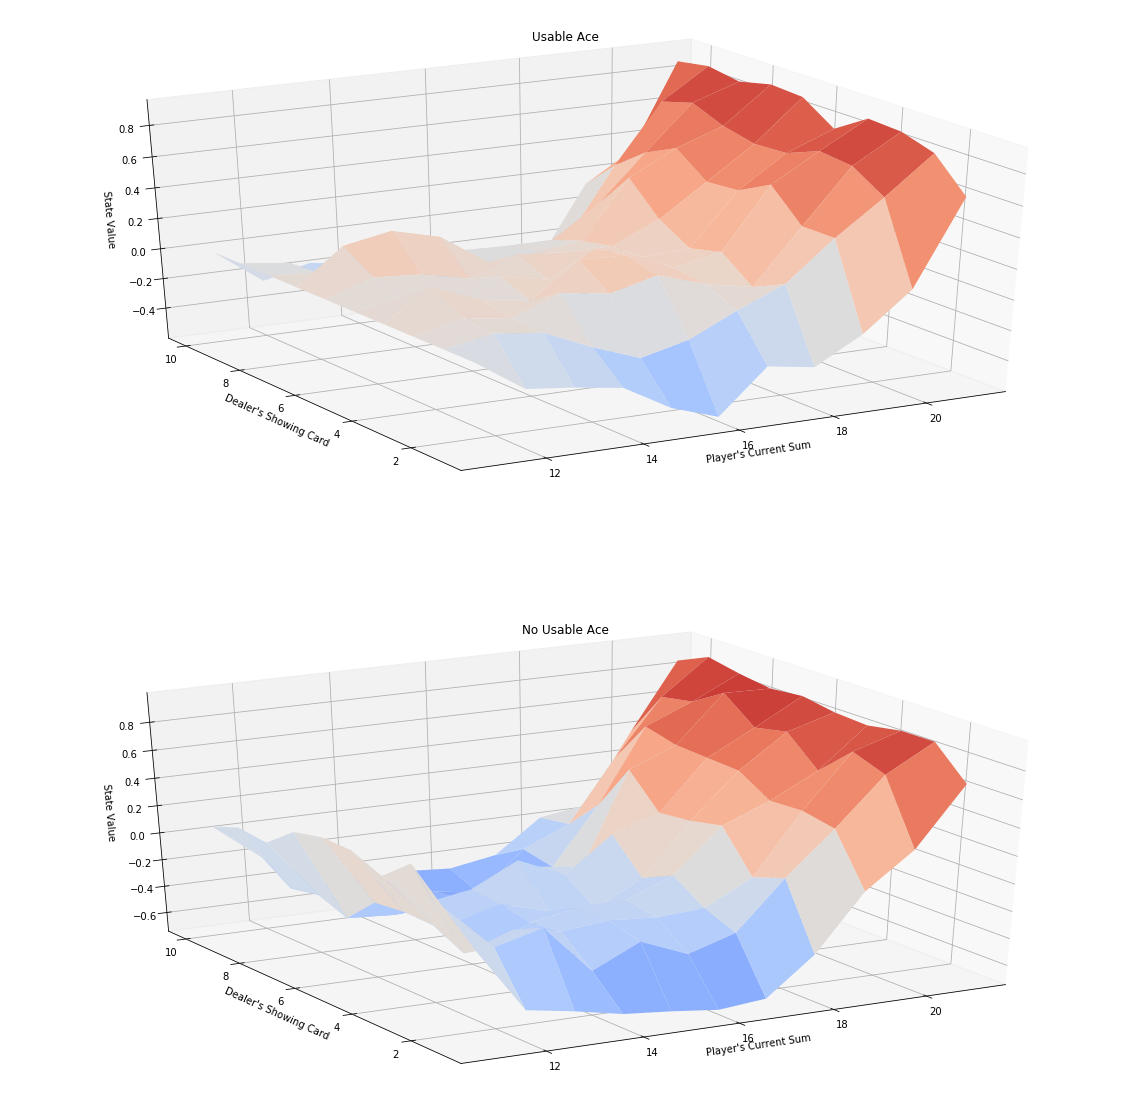

In [30]:
# obtain the corresponding state-value function
V = dict((k,np.max(v)) for k, v in Q.items())

# plot the state-value function
plot_blackjack_values(V)

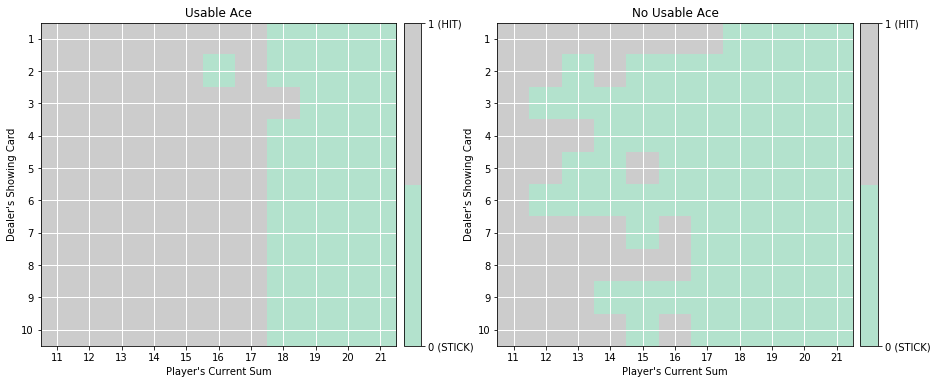

In [31]:
plot_policy(policy)